# Python Intermediate

![python](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)


_I have made this longer than usual because I have not had time to make it shorter._

--- Blaise Pascal (1623-1662)

## Functional programming

![lambda](/files/images/lambda.png)

* A programming paradigm that treats computation as the evaluation of **mathematical** functions and avoids changing-state and mutable data. 
* It is a declarative programming paradigm, which means programming is done with **expressions**. 
* In functional code, the **output** value of a function depends **only** on the arguments that are **input** to the function, so calling a function f twice with the same value for an argument x will produce the same result f(x) each time. 

In [ ]:
# use function as parameter
def get_visit_ips(file_path, callback):
    with open(file_pth) as fp:
        return [callback(line) for line in fp]

In [ ]:
# return function
def cache(func):
    cached = {}
    def _func(attr, *args, **kwargs):
        if attr not in cached:
            cached[attr] = func(attr, *args, **kwargs)
        return cached[attr]
    
    return _func
        

In [ ]:
# lambda
lambda : True
lambda x: x ** 2
lambda x, y: x + y

In [ ]:
# map|reduce
map(lambda x: x ** 2, range(10))

reduce(lambda x, y: x + y, range(10))

### Decorator

In [ ]:
class MyDict(dict):
    @property
    def max(self):
        return max(self.values())

MyDict(a=1, b=2, c=3).max

In [ ]:
# cache wrapper
def cache(func):
    cached = {}
    def _f(*args):
        if args not in cached:
            result = func(*args)
            cached[args] = result
        else:
            print 'cache hint!'
        return cached[args]
    return _f

@cache
def sum_(*args):
    return sum(args)

print sum_(1,2,3)
print sum_(1,2,3)

### Closure

In [ ]:
# cache wrapper for function
import time

def cache(timeout):
    def _wrapped(func):
        cached_start = {}
        cached = {}
        def _f(*args):
            if args not in cached or ((time.time() - cached_start[args]) > timeout):
                result = func(*args)
                cached[args] = result
                cached_start[args] = time.time()
            else:
                print 'cache hint!'
            return cached[args]
        return _f
    return _wrapped

@cache(2)
def sum_(*nums):
    return sum(nums)

print sum_(1,2,3)
print sum_(1,2,3)
from time import sleep
sleep(2)
print sum_(1,2,3)

### functools

In [ ]:
import functools

In [ ]:
# functools.partial
import functools

def echo(name, city, country):
    print '%s live in %s, %s' % (name, city, country)
    
f = functools.partial(echo, city='Hangzhou', country='China')

f('Tom and Jerry')

In [ ]:
# functools.wraps
import functools

def before_deco(f):
    @functools.wraps(f)
    def wrapper(*args, **kwargs):
        print 'before'
        return f(*args, **kwargs)
    
    return wrapper

@before_deco
def test(name):
    print name
    
print test.func_name

### Practice

In [ ]:
# implement a to_int function, that convert hex string data to integer
# eg:
#     to_int('\xef')  ==> 239
#     to_int('\xef\x01')  ==> 61185
# NOTE: builtin function ord can return the integer ordinal of a one-character string


## Introspection

![introspection](/files/images/introspection.jpg)

In [ ]:
# dir
import os

print dir(os)

In [ ]:
# type
s = 'hello world'

print type(s)

In [ ]:
# isinstance & issubclass
class A(object):
    pass

class B(A):
    pass

a = A()
b = B()

print isinstance(a, A)
print isinstance(a, B)
print isinstance(b, B)
print isinstance(b, A)

print issubclass(B, A)
print issubclass(A, B)

In [ ]:
# hasattr
class DynamicObject(object):
    def __getattr__(self, attr):
        if attr in ('a', 'b', 'c'):
            return attr.upper()
        raise AttributeError

obj = DynamicObject()

print hasattr(obj, 'a')
print hasattr(obj, 'd')


### Practice

In [ ]:
# 1. implement a bash wrapper, so that I can call bash command like a class attribute
#
#     bash = BashWrapper()
#     bash.ping('10.69.69.124')
#     bash.ls('-l', '~')
#
# Write your code here

# 2. what about a bash wrapper module, so that I can call bash command like a module import
#     from bashwrapper import ping
#     ping('10.69.69.124')
#     from bashwrapper import ls
#     ls('-l', '~')

## Unit Testing and TDD

In [ ]:
# Unit Testing
import unittest

def to_int(data):
    return 1

class TestToInt(unittest.TestCase):
    def test_to_int_with_one_char_string(self):
        self.assertEqual(to_int('\x01'), 1)
    
    def test_to_int_with_two_chars_string(self):
        self.assertEqual(to_int('\xef\x01'), 61185)

suite = unittest.TestLoader().loadTestsFromTestCase(TestToInt)
unittest.TextTestRunner().run(suite)

In [ ]:
# mock
import time

def delay_print(msg, delay):
    time.sleep(delay)
    print msg
    
import unittest

time.sleep = lambda x: True

class TestDelayPrint(unittest.TestCase):
    def test_delay_print_empty_string(self):
        delay_print('', 5)
            
suite = unittest.TestLoader().loadTestsFromTestCase(TestDelayPrint)
unittest.TextTestRunner().run(suite)

### TDD

![lambda](/files/images/tdd.jpg)

### Practice

>Generate prime factors of a number

In [ ]:
# Generate prime factors of a number
import unittest
from unittest import defaultTestLoader

def get_prime_factors(n):
    return None

class TestPrimeFactors(unittest.TestCase):
    pass

# if __name__ == '__main__':
#     unittest.main()
runner = unittest.TextTestRunner()
suite = unittest.TestSuite()
suite.addTests(defaultTestLoader.loadTestsFromTestCase(TestPrimeFactors))
runner.run(suite)

## Run in Parallel

![run](/files/images/run.png)

In [ ]:
# fetch content size from a series of web sites
import urllib

urls = ['http://hztdltev01.china.nsn-net.net',
        'http://10.56.117.81/coci/',
        'http://coop.china.nsn-net.net']

for url in urls:
    print len(urllib.urlopen(url, proxies={}).read())

In [ ]:
# introduce thread
from threading import Thread
import urllib

urls = ['http://hztdltev01.china.nsn-net.net',
        'http://10.56.117.81/coci/',
        'http://coop.china.nsn-net.net']

class UrlFetchThread(Thread):
    def __init__(self, url, *args):
        super(UrlFetchThread, self).__init__(*args)
        self._url = url
        
    def run(self):
        print len(urllib.urlopen(self._url).read())
        
threads = map(UrlFetchThread, urls)
for t in threads:
    t.start()
    t.join()
    

In [ ]:
# introduce multi process
from multiprocessing import Process
import urllib

urls = ['http://hztdltev01.china.nsn-net.net',
        'http://10.56.117.81/coci/',
        'http://coop.china.nsn-net.net']

class UrlFetchProcess(Process):
    def __init__(self, url, *args):
        super(UrlFetchProcess, self).__init__(*args)
        self._url = url
        
    def run(self):
        print len(urllib.urlopen(self._url).read())
        
processes = map(UrlFetchProcess, urls)
for p in processes:
    p.start()
    p.join()

In [ ]:
# use Pool
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool

urls = ['http://hztdltev01.china.nsn-net.net',
        'http://10.56.117.81/coci/',
        'http://coop.china.nsn-net.net']

def fetch_content(url):
    print len(urllib.urlopen(url).read())
    
pool = Pool()
pool.map(fetch_content, urls)
pool.close()
pool.join()

# -----------------------------------------
thread_pool = ThreadPool()
thread_pool.map(fetch_content, urls)
thread_pool.close()
thread_pool.join()

In [ ]:
# introduce gevent
import gevent
from gevent import monkey
monkey.patch_all()

urls = ['http://hztdltev01.china.nsn-net.net',
        'http://10.56.117.81/coci/',
        'http://coop.china.nsn-net.net']

def fetch_content(url):
    print len(urllib.urlopen(url).read())
    
[gevent.spawn(fetch_content, url) for url in urls]

gevent.wait()

### Practice

In [ ]:
# 1. There is a set of IP addresses 10.140.[22-32].[10-181], find out the fastest server and print its address,
# EG: ping -c 1 10.140.22.33
# 2. improve the performance

## Web Development

![Python Web](/files/images/pyweb.png)

In [ ]:
# BaseHTTPServer and SimpleHTTPServer
# python -m SimpleHTTPServer 8080
from BaseHTTPServer import HTTPServer
from SimpleHTTPServer import SimpleHTTPRequestHandler

server = HTTPServer(('0.0.0.0', 8282), SimpleHTTPRequestHandler)

server.serve_forever()

In [ ]:
# with micro framework bottle.py
from bottle import route, run, template

@route('/hello/<name>')
def index(name):
    return template('<b>Hello {{name}}</b>!', name=name)

run(host='localhost', port=8181)

### Practice

In [ ]:
# implement a simple REST service for user operation using Python, 
#   you can store the user info into memory, DB or files.
#   the return data should be in JSON format, 
#     GET/POST/DELETE method should be supported
# Example:
#     GET  /api/users  ==> ['tom', 'jerry', 'lily']
#     POST  /api/users  ['james', 'terry']  ==>  ['tom', 'jerry', 'lily', 'james', 'terry']
#     DELETE  /api/users/james      ==>  ['tom', 'jerry', 'lily', 'terry']


## A byte of pandas

> `pandas` is a data processing and analysis framework of Python, with it, you can handle huge amout of data easily and efficiency.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

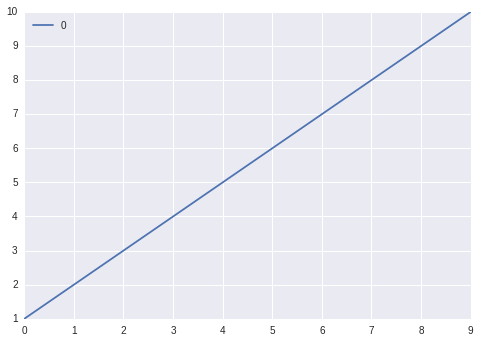

In [57]:
# a simplest example
from pandas import DataFrame
data = DataFrame([1,2,3,4,5,6,7,8,9,10])
data.plot()

In [58]:
# read data from nginx access log
from pandas import DataFrame
import re

_ptn = re.compile(r'(\S+) \S+ \S+ \[(.+)\] "(\S+) (\S+) (\S+)" (\d+) (\d+) ".*" "(.*)"')
def _parse_line(line):
    return _ptn.search(line).groups()

with open('access_10000.log') as f:
    data = DataFrame(map(_parse_line, f), columns=[
            'src', 'date', 'method', 'dst', 'protocol', 'code', 'length', 'agent'])

In [80]:
# using data
data # all columns and rows
data[:10] # first 10 rows
data['src'] # only src column
data[['src', 'agent']] # src and agent columns
data[data['code'].astype(int) >= 400] # code larger than 400 records

,src,date,method,dst,protocol,code,length,agent


In [60]:
# groupby
data.groupby('src').size().sort_values(ascending=False)[:10] # top 10 visitors
data['src'].value_counts()[:10] # top 10 visitors

10.140.90.80      758
10.140.27.203     635
10.141.46.142     532
10.140.24.238     376
10.140.24.68      375
10.140.164.196    350
10.142.233.18     297
10.142.233.34     283
10.142.233.178    268
10.140.25.63      260
Name: src, dtype: int64

In [ ]:
# use time series
# 1. convert string date to datetime
from dateutil.parser import parse

def convert_date(raw_date):
    return parse(raw_date.replace(':', ' ', 1))

data['date'] = data.date.apply(convert_date)

In [85]:
# 2. datetime series
from pandas import Series
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1,3), datetime(2011,1,4), datetime(2011,1,4), datetime(2011,1,5), datetime(2011,1,6)]
ts = Series(np.random.randn(6), index=dates)
print ts
ts['2011/1/2']

2011-01-02    1.243508
2011-01-03    0.614472
2011-01-04    1.459223
2011-01-04    1.283191
2011-01-05   -0.868181
2011-01-06    0.474250
dtype: float64


1.24350753296945

In [62]:
# plot

### Practice

In [63]:
# TODO:

## Reference

* http://www.diveintopython.net/power_of_introspection/
* https://docs.python.org/2/library/inspect.html
* https://docs.python.org/2/howto/functional.html
* https://en.wikipedia.org/wiki/Functional_programming
* https://docs.python.org/2/library/functions.html#iter
* http://butunclebob.com/files/downloads/Prime%20Factors%20Kata.ppt
* https://blog.8thlight.com/uncle-bob/2013/05/27/TheTransformationPriorityPremise.html
* https://wiki.python.org/moin/Generators
* https://docs.python.org/2/library/threading.html
* https://docs.python.org/2/library/multiprocessing.html
* http://www.gevent.org/intro.html
* http://bottlepy.org/docs/dev/index.html
* http://api.mongodb.org/python/current/tutorial.html
* https://docs.python.org/2/library/simplehttpserver.html

## Q & A